# Google Software Engineer Job Openings Analysis
Analytical objects: all jobs related to the keyword `software`.

In [1]:
# Make your plot output stored in the notebook.
%matplotlib inline

import sys
sys.path.insert(0, '../modules/')
from fintextmin import *

import nltk
import pandas
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')

df = pandas.read_csv('google_jobs.csv')
df.head(10)

,title,location,minimum_qual,preferred_qual,responsibilities
0,Front End Software Engineer,"Pittsburgh, PA, USA",BA/BS degree or equivalent practical experienc...,"4 years of relevant work experience, including...",Build next-generation web applications with a ...
1,"Software Engineer, HTML5 Video, Google Cloud P...","Sunnyvale, CA, USA",BS degree in Electrical Engineering or Compute...,MS degree in Electrical Engineering or Compute...,"Design, implement and launch complex HTML5 vid..."
2,"Front End Software Engineer, YouTube","San Bruno, CA, USA",BA/BS in Computer Science or related technical...,Experience with one or more general purpose pr...,"Design, implement and launch highly-visible, p..."
3,"Software Engineer, Google Home","Shanghai, China","Bachelor's degree in Computer Science, Electri...",Experience working with hardware designers/rea...,Develop the whole software stack for consumer ...
4,"Software Engineer, Front End Development",Singapore,"Bachelor's degree in a technical field, or equ...","Development experience in designing modular, o...",Build next-generation web applications with a ...
5,"Wireless Software Engineer, Google Home","Taipei, Taiwan",Master's degree in Electrical Engineering or C...,PhD degree.\nExperience with wireless protocol...,"Participate in architecting, developing, testi..."
6,"Network Engineer, Software and Automation","Sydney NSW, Australia",BA/BS in Computer Science or related field or ...,Master's degree or PhD in Computer Science or ...,Engage in and improve the lifecycle of service...
7,"Software Engineer, Cloud SQL","Sunnyvale, CA, USA","BS degree in Computer Science, similar technic...",10 years of relevant work experience in softwa...,Work alongside the Technical Lead to drive lon...
8,"Software Engineer, Infrastructure (English)","Tel Aviv-Yafo, Israel","Bachelor's degree in Computer Science, a relat...",Master’s degree.\nExperience with Unix/Linux o...,"Design, develop, test, deploy, maintain and im..."
9,Software Engineer,"Seoul, South Korea","Bachelor's degree in Computer Science, similar...","Master’s degree or PhD in Engineering, Compute...","Design, develop, test, deploy, maintain and im..."


## 1. Minimum/Preferred Degree Requirements

In [2]:
def count_keywords_freq(df: pandas.DataFrame, col_name: str, keywords: list, none=False):
    """ Given a list of keywords and count their frequency in
    the specified pandas dataframe.
    :param d: target pandas dataframe.
    :param col_name: target column name.
    :param keywords: a list of keywords.
    :param none: count the items that contain no specified keywords at all.
    :return: keyword frequency dict.
    """
    freq = {keyword: 0 for keyword in keywords}
    
    for keyword in keywords:
        freq[keyword] = df[col_name].str.contains(keyword, regex=False).sum()
    
    if none is True:
        freq['None'] = 0
        for col in df[col_name]:
            freq['None'] += 0 if type(col) is str and any(w in col for w in keywords) else 1
                    
    return freq

In [3]:
keywords = ['PhD', 'Master', 'MBA', 'BA', 'BS', 'Bachelor']

# Count keyword frequency.
min_degree_reqs = count_keywords_freq(df, 'minimum_qual', keywords, none=True)
pref_degree_reqs = count_keywords_freq(df, 'preferred_qual', keywords, none=False)

print("Minimum: " + str(min_degree_reqs))
print("Preferred: " + str(pref_degree_reqs))

Minimum: {'PhD': 66, 'Master': 33, 'MBA': 20, 'BA': 471, 'BS': 614, 'Bachelor': 868, 'None': 131}
Preferred: {'PhD': 313, 'Master': 405, 'MBA': 111, 'BA': 115, 'BS': 27, 'Bachelor': 34}


In [4]:
min_degree_df = pandas.DataFrame.from_dict(min_degree_reqs, orient='index', columns=['Count'])
pref_degree_df = pandas.DataFrame.from_dict(pref_degree_reqs, orient='index', columns=['Count'])

min_degree_df

,Count
PhD,66
Master,33
MBA,20
BA,471
BS,614
Bachelor,868
None,131


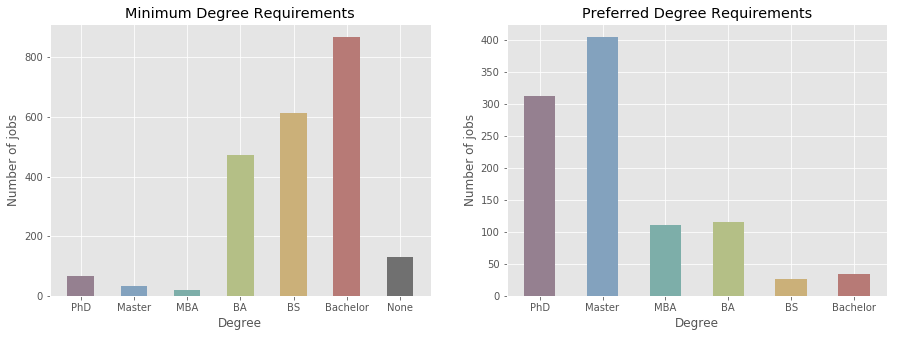

In [5]:
colors = ['#958090', '#83A2BE', '#7DAEA9', '#B4BF86', '#CBB079', '#B77A76', '#707070', '#AAAAAA']

min_labels = list(min_degree_reqs.keys())
min_values = list(min_degree_reqs.values())

pref_labels = list(pref_degree_reqs.keys())
pref_values = list(pref_degree_reqs.values())


plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.bar(min_labels, min_values, color=colors, width=0.5)
plt.xlabel('Degree')
plt.ylabel('Number of jobs')
plt.title('Minimum Degree Requirements')

plt.subplot(122)
plt.bar(pref_labels, pref_values, color=colors, width=0.5)
plt.xlabel('Degree')
plt.ylabel('Number of jobs')
plt.title('Preferred Degree Requirements')

plt.show()

---

## 2. Minimum/Preferred Experience Requirements

In [6]:
def extract_experience(df: pandas.DataFrame, col_name: str, start_year=0, end_year=20):
    """ Extract years of experiences required
    :param df: target dataframe.
    :param col_name: name of the column that contains strings
                     like `4 years of experience in ...`
    :param start_year: the starting year in the list returned.
    :param end_year: the last year in the list returned.
    :return: a list of years of exp required (index by years)
    """
    import re
    
    exp_list = [0] * 21
    
    for col in df[col_name]:
        if type(col) is not str:
            continue
        exp_required = re.findall('\d+ year', col)
        year = 0 if not exp_required else int(exp_required[0].replace(' year', ''))
        exp_list[year] += 1
        
    return exp_list

In [7]:
# Initialize a list with 0 from index 0 to 20.
min_exp_list = extract_experience(df, 'minimum_qual')
pref_exp_list = extract_experience(df, 'preferred_qual')

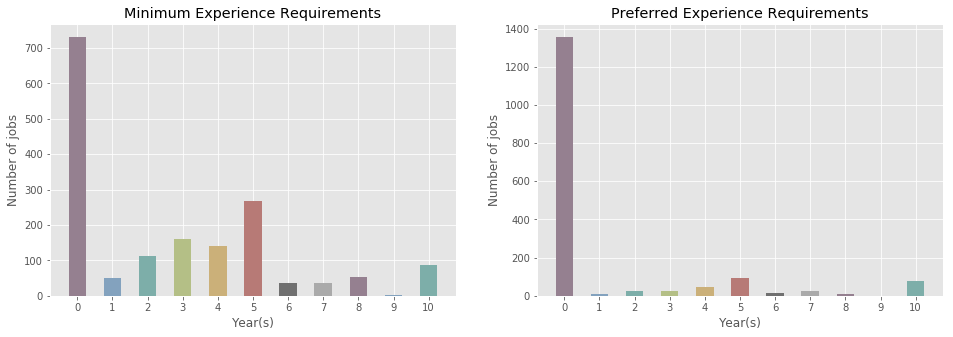

In [8]:
colors = ['#958090', '#83A2BE', '#7DAEA9', '#B4BF86', '#CBB079', '#B77A76', '#707070', '#AAAAAA']
labels = np.arange(len(min_exp_list))

plt.figure(figsize=(16, 5))

plt.subplot(121)
plt.bar(np.arange(11), min_exp_list[0:11], color=colors, width=0.5)
plt.xticks(labels[0:11])
plt.xlabel('Year(s)')
plt.ylabel('Number of jobs')
plt.title('Minimum Experience Requirements')

plt.subplot(122)
plt.bar(labels[0:11], pref_exp_list[0:11], color=colors, width=0.5)
plt.xticks(labels[0:11])
plt.xlabel('Year(s)')
plt.ylabel('Number of jobs')
plt.title('Preferred Experience Requirements')

plt.show()

---

## 3. Top 8 Job Titles

In [9]:
jobs_freq = {}

for col in df['title']:
    if type(col) is not str:
        continue
    col = col.split(',')[0]
    if col in jobs_freq:
        jobs_freq[col] += 1
    else:
        jobs_freq[col] = 1
        
jobs_freq = dict(sorted(jobs_freq.items(), key=lambda kv: kv[1], reverse=True))

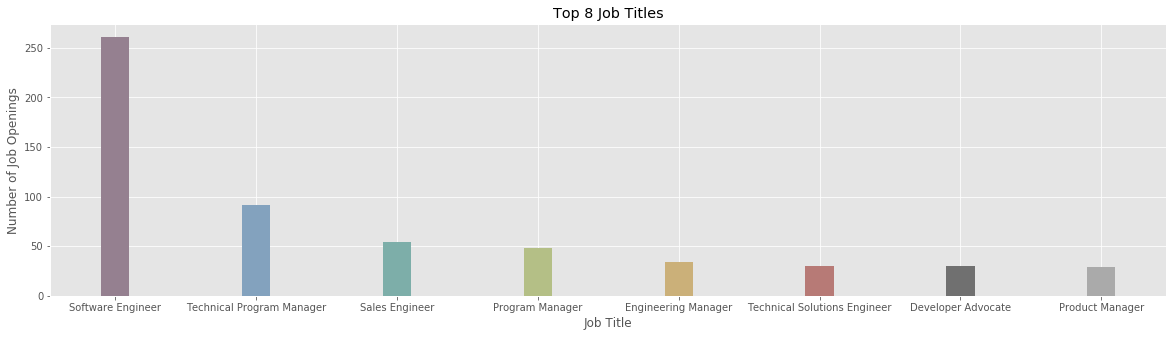

In [10]:
colors = ['#958090', '#83A2BE', '#7DAEA9', '#B4BF86', '#CBB079', '#B77A76', '#707070', '#AAAAAA']

min_labels = list(jobs_freq.keys())[0:8]
min_values = list(jobs_freq.values())[0:8]

plt.figure(figsize=(20, 5))
plt.bar(min_labels, min_values, color=colors, width=0.2)
plt.xlabel('Job Title')
plt.ylabel('Number of Job Openings')
plt.title('Top 8 Job Titles')
plt.show()

## 4. Top 10 Programming Languages

In [11]:
lang_colors = {
    'C++': '#F34B7D',
    'Java': '#B07219',
    'Python': '#3572A5',
    'JavaScript': '#F1E05A',
    'Go': '#375EAB',
    'PHP': '#4F5D95',
    'SQL': '#494D5C',
    'Ruby': '#701516',
    'Swift': '#FFAC45',
    'Kotlin': '#F18E33',
    'C#': '#178600',
    'Objective C': '#438EFF'
}

In [12]:
langs = lang_colors.keys()

# Count keyword frequency.
min_lang_reqs = count_keywords_freq(df, 'minimum_qual', langs)
pref_lang_reqs = count_keywords_freq(df, 'preferred_qual', langs)

# Sort the dicts.
min_lang_reqs = dict(sorted(min_lang_reqs.items(), key=lambda kv: kv[1], reverse=True))
pref_lang_reqs = dict(sorted(pref_lang_reqs.items(), key=lambda kv: kv[1], reverse=True))

# Create DataFrame from dict.
min_lang_df = pandas.DataFrame.from_dict(min_lang_reqs, orient='index', columns=['Count'])
pref_lang_df = pandas.DataFrame.from_dict(pref_lang_reqs, orient='index', columns=['Count'])

pref_lang_reqs

{'Java': 278,
 'Python': 275,
 'Go': 239,
 'JavaScript': 207,
 'SQL': 197,
 'C++': 162,
 'C#': 84,
 'Objective C': 55,
 'PHP': 33,
 'Ruby': 22,
 'Swift': 12,
 'Kotlin': 8}

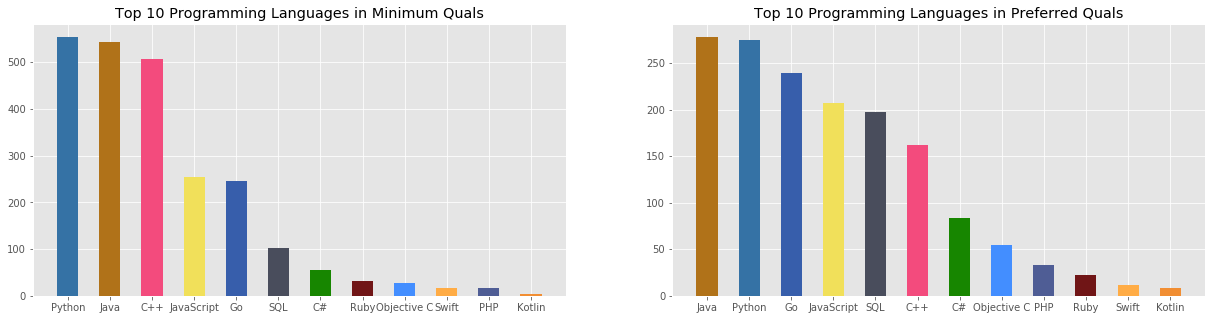

In [13]:
min_labels = list(min_lang_reqs.keys())
min_values = list(min_lang_reqs.values())
min_colors = [lang_colors[k] for k, v in min_lang_reqs.items()]

pref_labels = list(pref_lang_reqs.keys())
pref_values = list(pref_lang_reqs.values())
pref_colors = [lang_colors[k] for k, v in pref_lang_reqs.items()]


plt.figure(figsize=(21, 5))

plt.subplot(121)
plt.bar(min_labels, min_values, color=min_colors, width=0.5)
plt.title('Top 10 Programming Languages in Minimum Quals')

plt.subplot(122)
plt.bar(pref_labels, pref_values, color=pref_colors, width=0.5)
plt.title('Top 10 Programming Languages in Preferred Quals')

plt.show()

## 5. Top Demanding Skills
Extract keywords and create word clouds from the following:
* Minimum Qualifications
* Preferred Qualifications
* Responsibilities

### Word frequency matrix
For each job, we create a  wfm (word frequency matrix) and store all results in a dict.

In [14]:
def import_terms(tokenizer: nltk.tokenize.MWETokenizer, term_file_path: str):
    """ Import all user-defined untokenizable terms from a file into nltk MWETokenizer.
    :param tokenizer: nltk MWETokenizer instance.
    :param text_file_path: path to the file.
    """
    with open(term_file_path, 'r') as f:
        for line in f:
            tokenizer.add_mwe(line.strip().split())

In [20]:
def tokenize(tokenizer: nltk.tokenize.MWETokenizer, s: str, lowercase=True, preserve_case_words=[]):
    """ Tokenize given string using nltk MWETokenizer.
    :param case: convert all tokens into lowercase.
    :param exclude_words: words that should preserve their cases.
    :return: a list of tokens.
    """
    tokens = nltk.tokenize.word_tokenize(s)
    tokens = tokenizer.tokenize(tokens)
    
    # Remove tokens that are either purely digits or purely punctuations.
    tokens = list(filter(lambda token: not token.isdigit() and re.search('[a-zA-Z]', token), tokens))

    # Since nltk MWETokenizer will not split tokens that contain a slash,
    # we'll have to do it ourselves.
    for token in tokens:
        if '/' in token:
            tokens += token.split('/')
            tokens.remove(token)
            
    # Lowercase conversion.
    tokens = [token.lower() if token not in preserve_case_words else token for token in tokens ]
            
    return tokens

# Usage: tokenize(tokenizer, string, lowercase=True, preserve_case_words=['Go'])
#s = r'Fluent in at least one scripting language in addition to Bash (Ruby/Python/Go etc...).'
#tokenizer = nltk.tokenize.MWETokenizer(separator=' ')
#import_terms(tokenizer, 'cs_terms.txt')
#tokenize(tokenizer, s, preserve_case_words=lang_colors.keys())

['fluent',
 'in',
 'at',
 'least',
 'one',
 'scripting_language',
 'in',
 'addition',
 'to',
 'bash',
 'etc',
 'Ruby',
 'Python',
 'Go']

In [21]:
def create_word_freq_dict(tokenizer, df, col_name, lowercase=True, preserve_case_words=[]):
    """ Create a word frequency dict
    :param tokenizer: nltk MWETokenizer.
    :param df: source pandas dataframe.
    :param col_name: name of the column to create wfm from.
    :param lowercase: convert all tokens into lowercase.
    :param preserve_case_words: words that should preserve their cases.
    :return: a word frequency dict (dict of dict, separated by job indices).
    """
    freq = {}
    
    for i, col in enumerate(df[col_name]):
        if type(col) is not str:
            continue
        freq[i] = {}
        
        words = tokenize(tokenizer, col, lowercase=True, preserve_case_words=preserve_case_words)
        for word in words:
            if word in freq:
                freq[i][word] += 1
            else:
                freq[i][word] = 1
                
    return freq

In [22]:
def create_wfm(word_frequency_dict: dict):
    """ Create word frequency matrix from the specified word frequency dict """
    dwf_list = [pandas.DataFrame(list(freq.values()), index=freq.keys()) for freq in word_frequency_dict.values()]
    wfm = pandas.concat(dwf_list, axis=1)
    wfm = np.transpose(wfm).fillna(0)
    wfm.index = word_frequency_dict.keys()
    return wfm

In [97]:
# Initialize nltk MWETokenizer.
tokenizer = nltk.tokenize.MWETokenizer(separator=' ')
import_terms(tokenizer, 'cs_terms.txt')

# Words that 
preserve_case_words = ['Go', '.Net', '.NET']

min_qual_wfd = create_word_freq_dict(tokenizer, df, 'minimum_qual', True, preserve_case_words)
pref_qual_wfd = create_word_freq_dict(tokenizer, df, 'preferred_qual', True, preserve_case_words)
resp_qual_wfd = create_word_freq_dict(tokenizer, df, 'responsibilities', True, preserve_case_words)

list(min_qual_wfd[0].items())[0:10]

[('degree', 1),
 ('or', 1),
 ('equivalent', 1),
 ('practical experience', 1),
 ('year', 1),
 ('of', 1),
 ('work experience', 1),
 ('in', 1),
 ('software development', 1),
 ('experience', 1)]

In [98]:
min_qual_wfm = create_wfm(min_qual_wfd)
pref_qual_wfm = create_wfm(pref_qual_wfd)
resp_wfm = create_wfm(resp_qual_wfd)

# Row: job, Column: word frequency
pref_qual_wfm.head(5)

/home/aesophor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,,'out,'s,.NET,0-in,25kg,25kg~,2d,2g,3a,...,year,years,yet,yield,you,your,youtube,zigbee,zones,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Apply TF-IDF Transformation to Word Frequency Matrices

In [99]:
def create_tfm(wfm):
    tfm = wfm.copy()
    for i in range(0, len(tfm)):
        tfm.iloc[i] = tfm.iloc[i] / tfm.iloc[i].sum()
    return tfm

min_qual_tfm = create_tfm(min_qual_wfm)
pref_qual_tfm = create_tfm(pref_qual_wfm)
resp_tfm = create_tfm(resp_wfm)

min_qual_tfm.head()

,,'s,-cycles,.NET,.Net,1-year,12-week,2-step,25kg,25kg/55lbs,...,xps,xslt,yarn,year,years,yeas,you,your,yourself,zones
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.034483,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.034483,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.043478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.037037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.037037,0.0,0.0,0.0,0.0,0.0


In [100]:
min_qual_df = (min_qual_wfm > 0).sum()
pref_qual_df = (pref_qual_wfm > 0).sum()
resp_df = (resp_wfm > 0).sum()

In [101]:
N = len(df)
N

1710

In [102]:
def create_tfidfm(tfm, N, df):
    tfidfm = tfm.copy()
    for i in range(0, len(tfidfm)):
        # Add 0.01 to not completely ignore irregular words.
        tfidfm.iloc[i] = tfidfm.iloc[i] * np.log10(N / df) + 0.01
    return tfidfm
    
min_qual_tfidfm = create_tfidfm(min_qual_tfm, N, min_qual_df)
pref_qual_tfidfm = create_tfidfm(pref_qual_tfm, N, pref_qual_df)
resp_tfidfm = create_tfidfm(resp_tfm, N, resp_df)

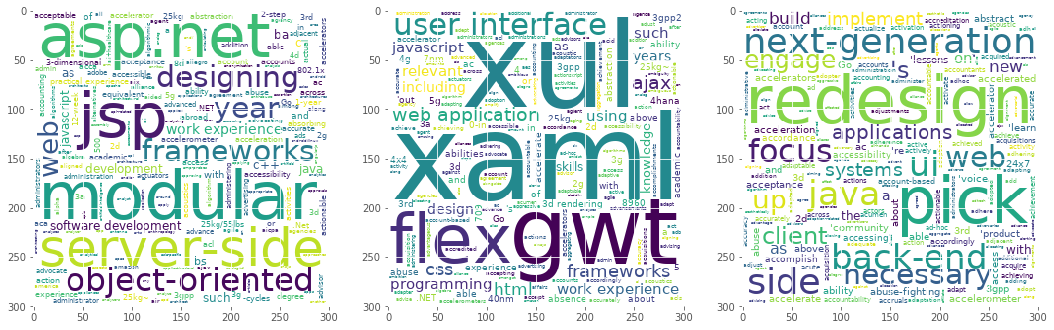

In [103]:
font_path = r'/usr/share/fonts/dejavu/DejaVuSans.ttf'

plt.figure(figsize=(18, 6))

# Minimum Qualification Word Cloud
ax1 = plt.subplot(131)
plot_tfidf_wordcloud(min_qual_tfidfm, text_index=0, ax=ax1, font_path=font_path, height=300, width=300)

# Preferred Qualification Word Cloud
ax2 = plt.subplot(132)
plot_tfidf_wordcloud(pref_qual_tfidfm, text_index=0, ax=ax2, font_path=font_path, height=300, width=300)

# Responsibilities Word Cloud
ax3 = plt.subplot(133)
plot_tfidf_wordcloud(resp_tfidfm, text_index=0, ax=ax3, font_path=font_path, height=300, width=300)

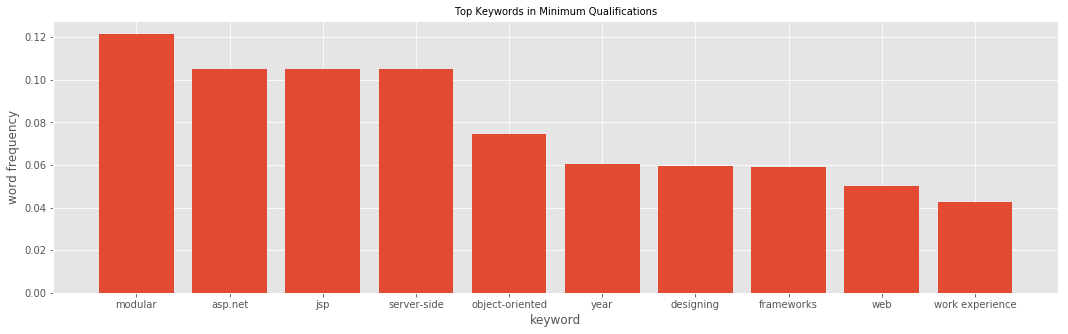

In [104]:
plt.figure(figsize=(18, 5))
ax1 = plt.subplot(1, 1, 1)
plt.xlabel('keyword')
plt.ylabel('word frequency')
title = 'Top Keywords in Minimum Qualifications'
plot_tfidf_bar(min_qual_tfidfm, text_index=0, ax=ax1, font_path=font_path, bin=10, title=title)

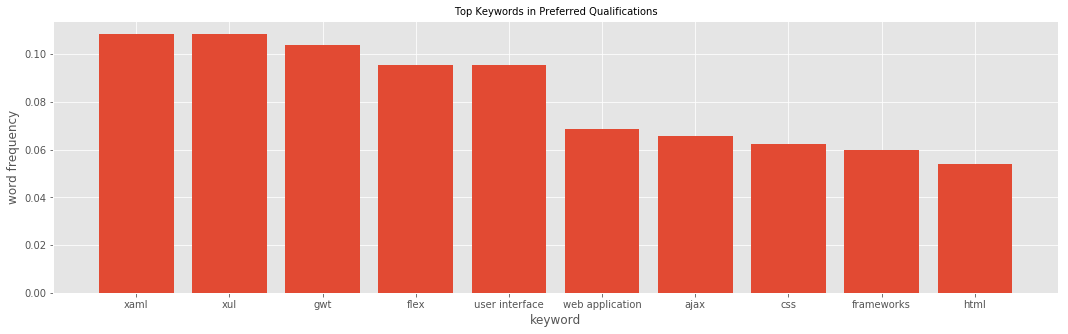

In [31]:
plt.figure(figsize=(18, 5))
ax1 = plt.subplot(1, 1, 1)
plt.xlabel('keyword')
plt.ylabel('word frequency')
title = 'Top Keywords in Preferred Qualifications'
plot_tfidf_bar(pref_qual_tfidfm, text_index=0, ax=ax1, font_path=font_path, bin=10, title=title)

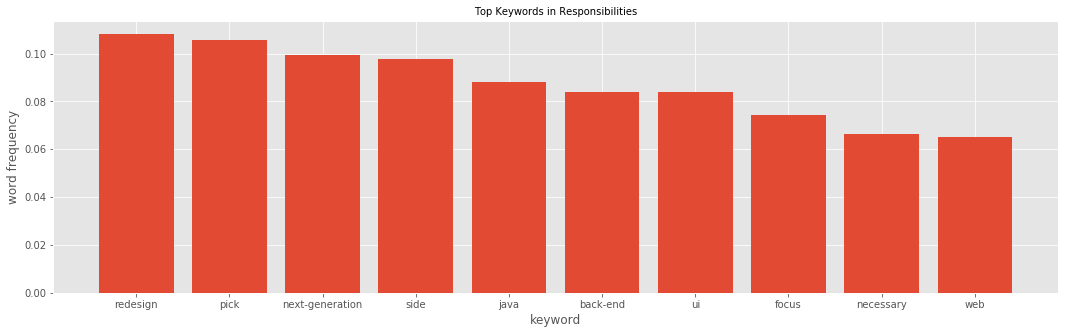

In [32]:
plt.figure(figsize=(18, 5))
ax1 = plt.subplot(1, 1, 1)
plt.xlabel('keyword')
plt.ylabel('word frequency')
title = 'Top Keywords in Responsibilities'
plot_tfidf_bar(resp_tfidfm, text_index=0, ax=ax1, font_path=font_path, bin=10, title=title)

### 6. Relation between Skills and Job Titles
Since I'm interested in software engineering only, so I'll categorize all jobs into two categories:
* Software Engineer (SE)
* non Software Engineer (nSE)

Then I'll see which skills are related to the jobs in the SE set.

In [76]:
r_df = df.copy()

# Split job titles by comma into separate columns.
r_df['title'] = r_df['title'].str.split(',', expand=True)[0]

# Classify job titles.
job_title_regex = '\w*Android\w*|\w*iOS\w*|\w*UX\w*|^Software Engineer$|Systems Administrator'
r_df['class'] = list(r_df['title'].str.contains(job_title_regex, regex=True))
r_df['class'][r_df['class'] == True] = 'SE'
r_df['class'][r_df['class'] == False] = 'nSE'

# Combine minimum_qual, preferred_qual and responsibilities into a single column.
r_df['text'] = list(r_df['minimum_qual'] + r_df['preferred_qual'] + r_df['responsibilities'])



# Drop unused columns.
r_df = r_df.drop(['location', 'minimum_qual', 'preferred_qual', 'responsibilities'], axis=1)
r_df.head(10)

,title,class,text
0,Front End Software Engineer,nSE,BA/BS degree or equivalent practical experienc...
1,Software Engineer,SE,BS degree in Electrical Engineering or Compute...
2,Front End Software Engineer,nSE,BA/BS in Computer Science or related technical...
3,Software Engineer,SE,"Bachelor's degree in Computer Science, Electri..."
4,Software Engineer,SE,"Bachelor's degree in a technical field, or equ..."
5,Wireless Software Engineer,nSE,Master's degree in Electrical Engineering or C...
6,Network Engineer,nSE,BA/BS in Computer Science or related field or ...
7,Software Engineer,SE,"BS degree in Computer Science, similar technic..."
8,Software Engineer,SE,"Bachelor's degree in Computer Science, a relat..."
9,Software Engineer,SE,"Bachelor's degree in Computer Science, similar..."


In [108]:
# Join the rows with same titles.
r_df = r_df.groupby(['title', 'class'])['text'].apply(' '.join).reset_index()

# Clean up the text.
tokenizer = nltk.tokenize.MWETokenizer(separator='_')
import_terms(tokenizer, 'cs_terms.txt')
r_df['text'] = r_df['text'].apply(lambda s: ' '.join(tokenize(tokenizer, s, lowercase=True, preserve_case_words=['Go', '.NET'])))

#s = r_df.iloc[3]['text']
#' '.join(tokenize(tokenizer, s, lowercase=True, preserve_case_words=['Go', '.NET']))

r_df

,title,class,text
0,AI Engineer,nSE,degree in computer_science mathematics or rela...
1,ASIC DFT Flow Methodology Implementation Engineer,nSE,years of experience in asic design for test in...
2,ASIC Design Verification Engineer,nSE,bs degree in electrical_engineering or compute...
3,ASIC SoC Electrical Analysis and Convergence E...,nSE,bachelor 's degree in technology electrical_en...
4,ASIC SoC Physical Design CAD Engineer,nSE,bachelor 's degree in electrical_engineering r...
5,ASIC Test Development and Sustainability Engineer,nSE,bachelor 's degree in engineering computer_sci...
6,ASIC Verification Engineer,nSE,bachelor 's degree in electrical_engineering o...
7,ASIC/SoC Design Verification Engineer,nSE,bs degree in electrical_engineering or compute...
8,ASIC/SoC Logical Equivalence and Power Intent ...,nSE,bachelor 's of technology or bachelor 's degre...
9,ASIC/SoC Low Power Engineer,nSE,bachelor 's of technology or bachelor 's degre...


In [109]:
corpus = r_df['text'].values.tolist()

In [110]:
# TF-IDF
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(corpus)  
word = vectorizer.get_feature_names()  

from sklearn.feature_extraction.text import TfidfTransformer  
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)

In [111]:
len(corpus)
features = tfidf.toarray()
labels = r_df['title'].values
labels[0:10]

array(['AI Engineer', 'ASIC DFT Flow Methodology Implementation Engineer',
       'ASIC Design Verification Engineer',
       'ASIC SoC Electrical Analysis and Convergence Engineer',
       'ASIC SoC Physical Design CAD Engineer',
       'ASIC Test Development and Sustainability Engineer',
       'ASIC Verification Engineer',
       'ASIC/SoC Design Verification Engineer',
       'ASIC/SoC Logical Equivalence and Power Intent Verification Engineer',
       'ASIC/SoC Low Power Engineer'], dtype=object)

In [112]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
transData = pca.fit_transform(features, labels)
type(transData)
r_df['pca1'] = pandas.DataFrame(transData[:,0])
r_df['pca2'] = pandas.DataFrame(transData[:,1])
r_df

,title,class,text,pca1,pca2
0,AI Engineer,nSE,degree in computer_science mathematics or rela...,0.050666,0.156976
1,ASIC DFT Flow Methodology Implementation Engineer,nSE,years of experience in asic design for test in...,-0.294894,0.042612
2,ASIC Design Verification Engineer,nSE,bs degree in electrical_engineering or compute...,-0.266973,0.048010
3,ASIC SoC Electrical Analysis and Convergence E...,nSE,bachelor 's degree in technology electrical_en...,-0.295508,-0.070387
4,ASIC SoC Physical Design CAD Engineer,nSE,bachelor 's degree in electrical_engineering r...,-0.252310,-0.040568
5,ASIC Test Development and Sustainability Engineer,nSE,bachelor 's degree in engineering computer_sci...,-0.260690,0.084970
6,ASIC Verification Engineer,nSE,bachelor 's degree in electrical_engineering o...,-0.257536,0.051165
7,ASIC/SoC Design Verification Engineer,nSE,bs degree in electrical_engineering or compute...,-0.271241,0.065954
8,ASIC/SoC Logical Equivalence and Power Intent ...,nSE,bachelor 's of technology or bachelor 's degre...,-0.286243,-0.048313
9,ASIC/SoC Low Power Engineer,nSE,bachelor 's of technology or bachelor 's degre...,-0.324000,-0.057555


/home/aesophor/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


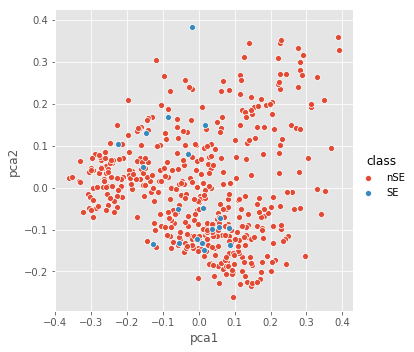

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(x_vars=['pca1'], y_vars=['pca2'], data=r_df, hue='class', size=5)

In [128]:
textFrame = pd.DataFrame(features, columns = word)
textFrame.head()
len(features)

469

In [129]:
allF = features.flatten()
nonZero = allF[np.nonzero(allF)]
m = np.median(nonZero)

In [130]:
allF[np.nonzero(allF)]

array([0.03583792, 0.08670403, 0.07101834, ..., 0.04193375, 0.09467156,
       0.00856287])

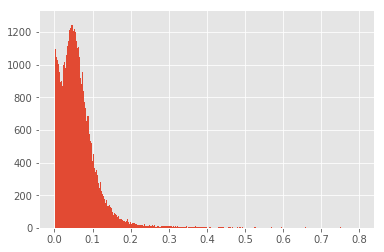

0.05321282042245596

In [131]:
plt.hist(nonZero, bins=500)
plt.show()
m

In [132]:
m = 0.1
dataset = list()
for i in range(len(features)):
    temp = textFrame.columns.values[[textFrame.iloc[i] >= m]]
    dataset.append(temp.tolist())

/home/aesophor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.


In [133]:
for i in range(len(features)):
    print(dataset[i])

['ai', 'and', 'beam', 'caffe', 'customers', 'data', 'elt', 'experience', 'face', 'h20', 'keras', 'machine_learning', 'of', 'or', 'scala', 'solutions', 'such', 'technical', 'theano', 'torch', 'working']
['and', 'asic', 'ate', 'bist', 'compiler', 'design', 'dft', 'experience', 'flows', 'ieee', 'ip', 'physical', 'power', 'scan', 'signoff', 'test', 'timing']
['and', 'blocks', 'coverage', 'design', 'experience', 'identify', 'measures', 'of', 'ovm', 'standard', 'stimulus', 'systemverilog', 'uvm', 'verification', 'vmm', 'with']
['analysis', 'and', 'convergence', 'drop', 'electrical', 'electromigration', 'em', 'grid', 'grids', 'ir', 'overall', 'power', 'rc', 'resistive', 'rush', 'understanding']
['and', 'cad', 'dc', 'floorplan', 'flow', 'flows', 'genus', 'high', 'icc2', 'industry_experience', 'innovus', 'maintenance', 'of', 'optimizations', 'performance', 'place', 'pnr', 'primetime', 'route', 'rtl2gds', 'scaling', 'semiconductor', 'setup', 'submicron', 'synthesis', 'synthesize', 'tempus', 'und

In [134]:
# Apriori: https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
graph = pd.DataFrame(te_ary, columns=te.columns_).T
graph.columns = r_df['title']

In [135]:
graph

title,AI Engineer,ASIC DFT Flow Methodology Implementation Engineer,ASIC Design Verification Engineer,ASIC SoC Electrical Analysis and Convergence Engineer,ASIC SoC Physical Design CAD Engineer,ASIC Test Development and Sustainability Engineer,ASIC Verification Engineer,ASIC/SoC Design Verification Engineer,ASIC/SoC Logical Equivalence and Power Intent Verification Engineer,ASIC/SoC Low Power Engineer,...,Vendor Program Manager,Video Algorithm Engineer,Video Solutions Consultant,Visual Designer,Voice User Interface Designer,Web Solutions Engineer,Web Solutions Engineering Manager,Wireless Software Engineer,Workforce Program Manager,iOS Software Engineer
10,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1x,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
232,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25kg,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3gpp2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4dcreate,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5g,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [136]:
from mlxtend.frequent_patterns import apriori

minsup = 0.01
apriori(graph, min_support = minsup, use_colnames=True)

,support,itemsets
0,0.011733,(Cloud AI Research Scientist)
1,0.010914,(Coding Assessment Developer (Area 120))
2,0.011187,(Digital Design Engineer)
3,0.010095,(Enterprise Account Executive)
4,0.010641,(Full Stack Developer)
5,0.010095,(Go-to-Market Analyst)
6,0.010368,(Hardware Test and Qualification Engineer)
7,0.010368,(Quantitative Analyst)
8,0.010368,(Staff Software Engineer)
9,0.010368,(Strategy Lead)


In [137]:
result = apriori(graph, min_support = minsup)
result

,support,itemsets
0,0.011733,(64)
1,0.010914,(75)
2,0.011187,(117)
3,0.010095,(139)
4,0.010641,(166)
5,0.010095,(184)
6,0.010368,(201)
7,0.010368,(306)
8,0.010368,(375)
9,0.010368,(385)


In [139]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

rules = association_rules(result, metric="confidence", min_threshold=0.7)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [140]:
rules = association_rules(result, metric="lift", min_threshold=1.2)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [141]:
rules["antecedant_len"] = rules["antecedents"].apply(lambda x: len(x))
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedant_len


In [142]:
out = rules[ (rules['antecedant_len'] >= 2) &
       (rules['confidence'] > 0.75) &
       (rules['lift'] > 1.2) ]
out.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedant_len


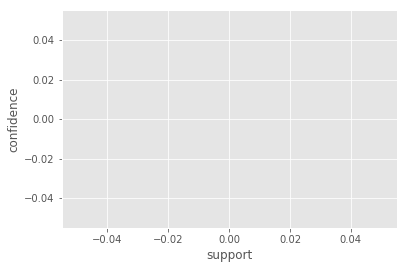

In [143]:
support = rules['support']
confidence = rules['confidence']
plt.scatter(support, confidence, alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

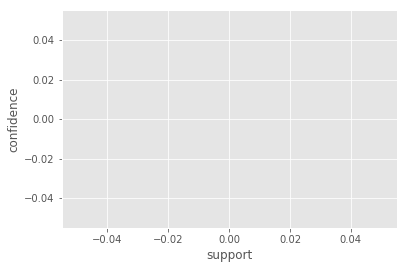

In [144]:
support = rules['support']
confidence = rules['confidence']
plt.scatter(support, confidence, alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [145]:
len(rules)
rules['antecedents'].head()

Series([], Name: antecedents, dtype: object)

In [146]:
import networkx as nx
G = nx.DiGraph()
for i in range(len(r_df)):
    G.add_node(i)
for i in range(len(rules['antecedents'])):
    currentFrom = list(rules['antecedents'][i])
    currentTo = list(rules['consequents'][i])
    for j in range(len(currentFrom)):
        G.add_edge(currentFrom[j], currentTo[0])

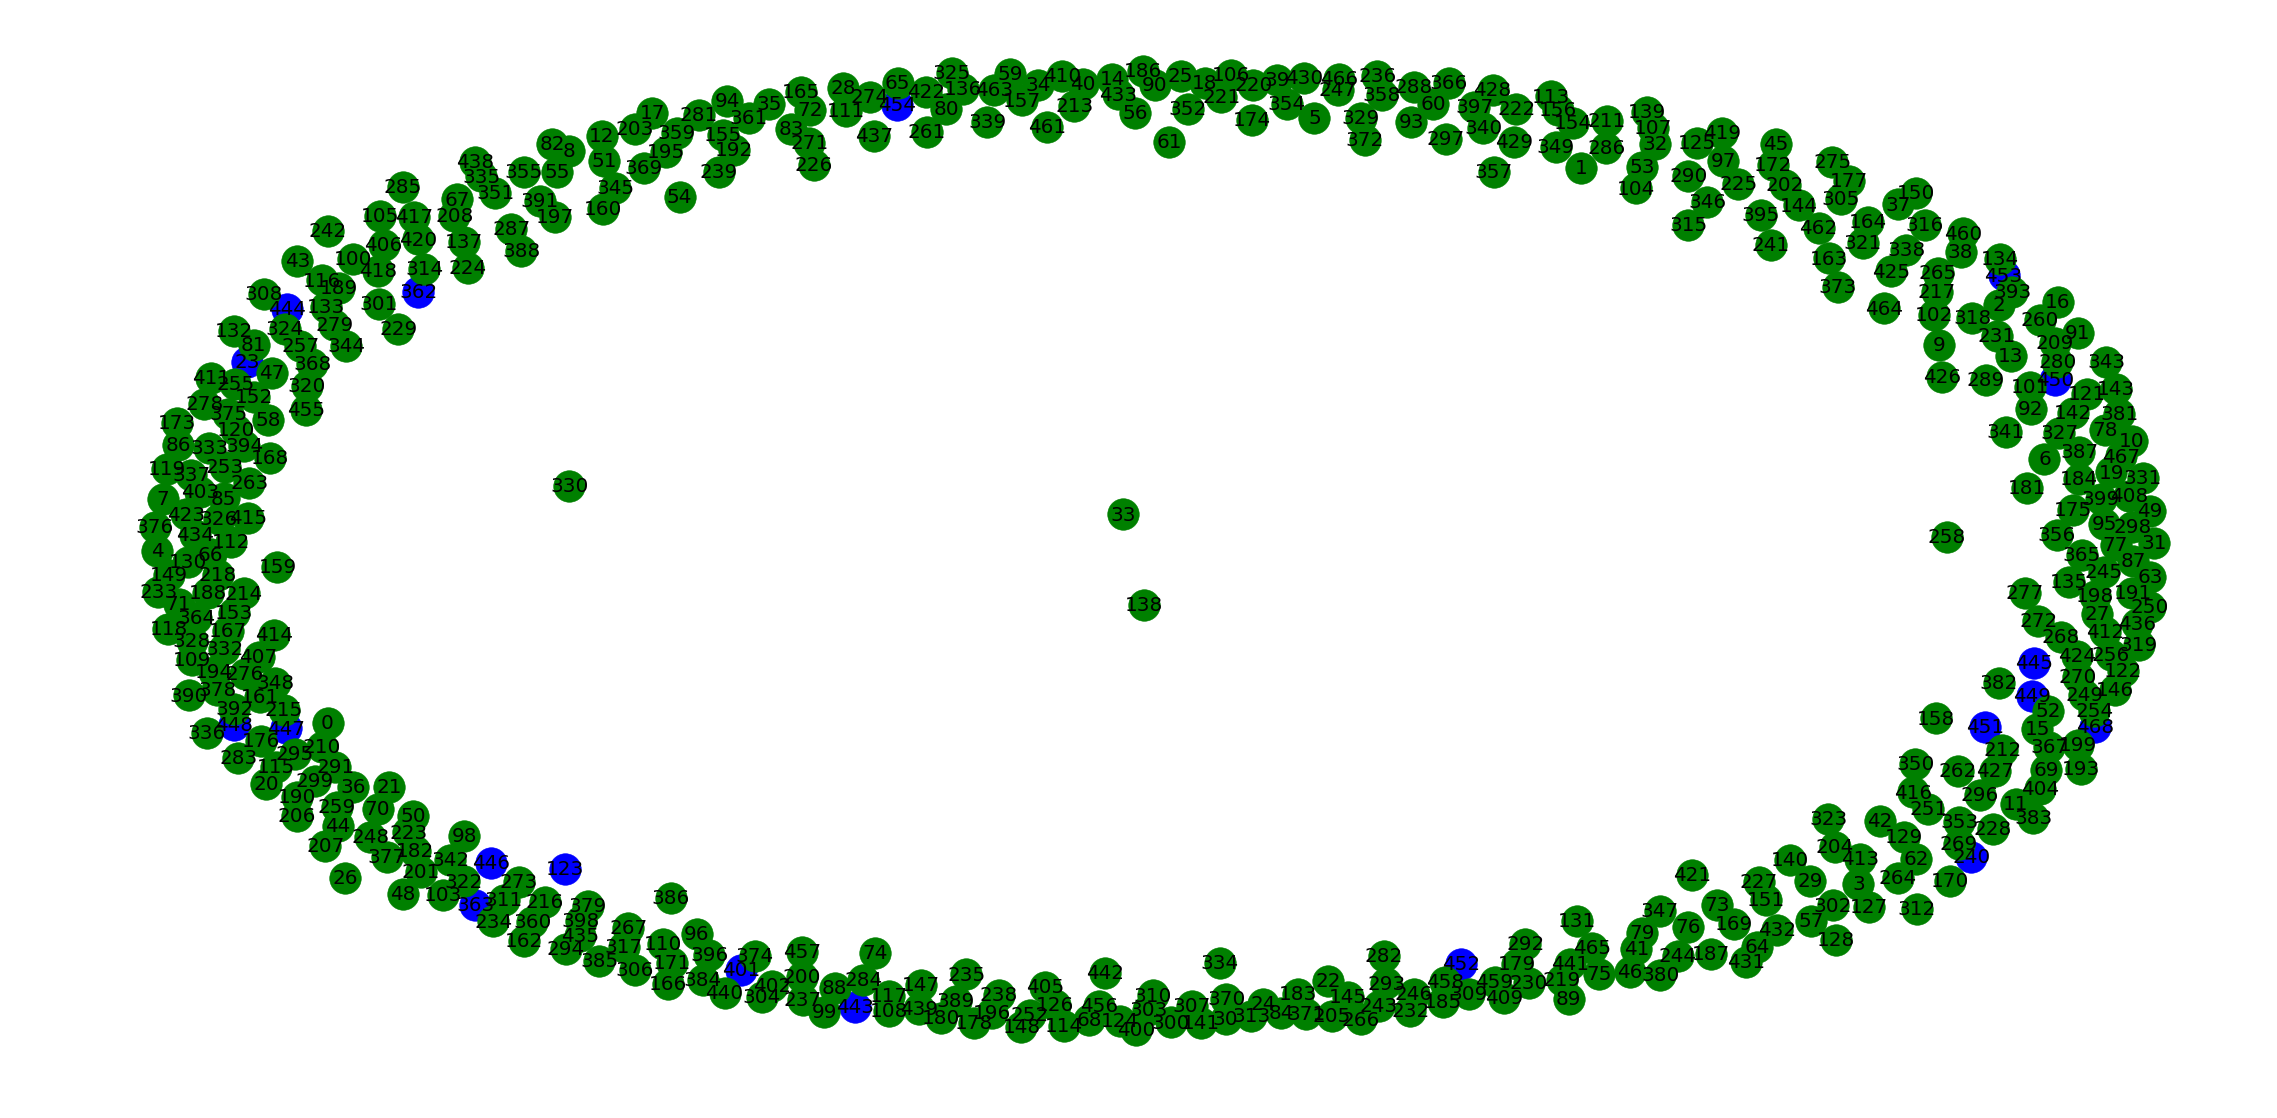

In [147]:
nodeListA = r_df.index[r_df['class'] == 'SE'].tolist()
nodeListB = r_df.index[r_df['class'] == 'nSE'].tolist()

plt.figure(figsize=(40,20))

# positions for all nodes
pos = nx.fruchterman_reingold_layout(G)

# nodes
nx.draw_networkx_nodes(G, pos, nodelist=nodeListA, node_color="b", node_size=1000)
nx.draw_networkx_nodes(G, pos, nodelist=nodeListB, node_color="g", node_size=1000)
nx.draw_networkx_edges(G, pos, width=6)

# labels
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')

plt.axis('off')
plt.savefig("weighted_graph.png") # save as png
plt.show() # display